**Iris Flower Classification**

The Iris flowers come in three species:

-Iris verginica
-Iris setosa
-Iris versicolor

This ML Project is about classifying and building a such type of model that would help in predicting flower species apart based on their features which would be supplied to us via the dataset.

The said features include:

-Sepal length
-Sepal width
-Petal length
-Petal width

The class variable here in this dataset is the species of the flower and there are three species of the flower reported in the aforementioned dataset.

**Importing the Modules**

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading the Dataset**

In [24]:
#loading the dataset into a variable
columns = [ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species' ]
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
#collecting some basic stats about the dataset

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Preprocessing and Visualisation of the Dataset**

In [26]:
#checking for any null values in the dataset

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

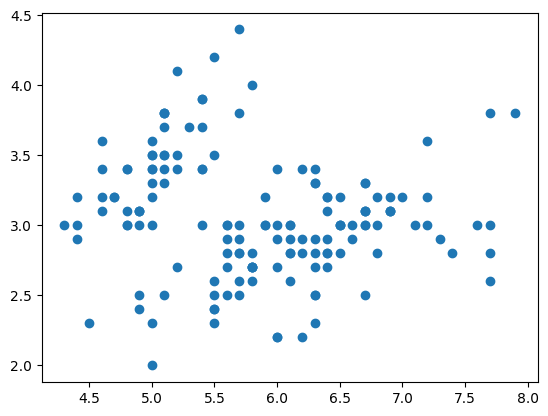

In [27]:
#visualisation of the dataset with the help of scatterplot

plt.scatter( 'sepal_length', 'sepal_width', data = df )

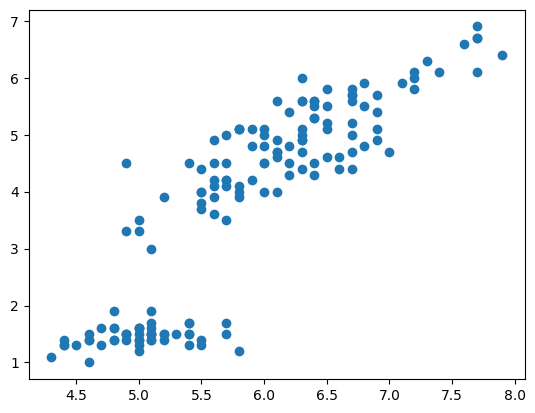

In [28]:
plt.scatter( 'sepal_length', 'petal_length', data = df )

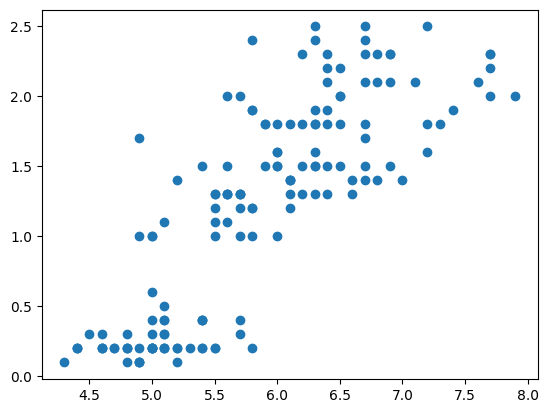

In [29]:
plt.scatter( 'sepal_length', 'petal_width', data = df )

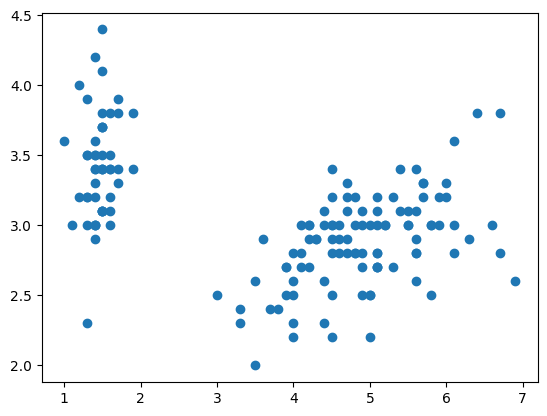

In [30]:
plt.scatter( 'petal_length', 'sepal_width', data = df )

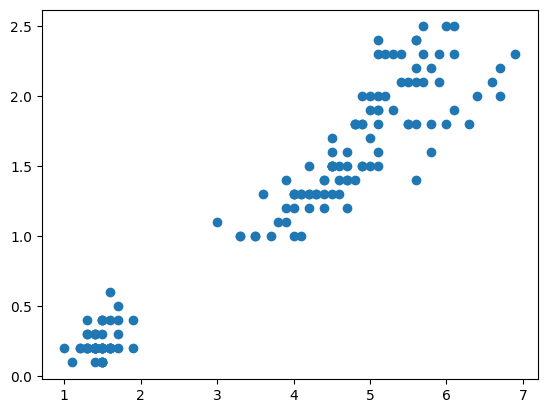

In [31]:
plt.scatter( 'petal_length', 'petal_width', data = df )

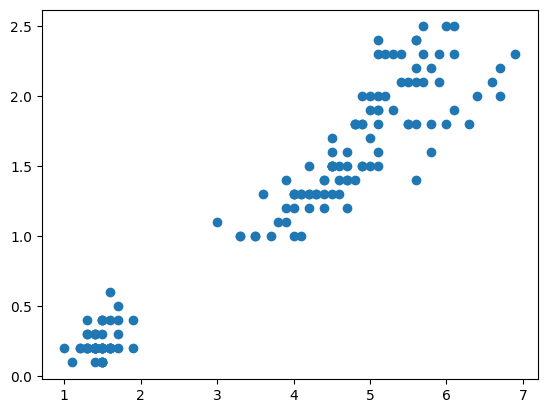

In [32]:
plt.scatter( 'petal_length', 'petal_width', data = df )

In [33]:
#creating a correlational matrix which will help in gauginng the influence of each feature's on itself and every other feature as well

df.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

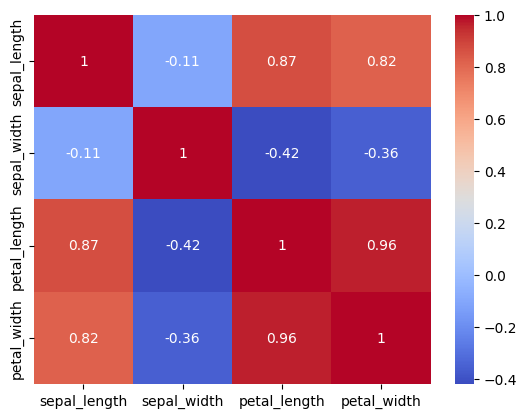

In [34]:
#visualising better the correlational matrix with the help of a heatmap

sns.heatmap( df.corr(numeric_only=True), annot = True, cmap = 'coolwarm' )

**Model Training**

In [35]:
#separating feature values and target values from each other

data = df.values
X = data[ :, 0:4 ]
Y = data[ :, 4 ]

In [36]:
#calculating the average of each features for all classes

Y_data = np.array( [np.average( X[ :, i ][ Y == j ].astype( 'float32' ) ) for i in range( X.shape[1] ) for j in ( np.unique( Y ) ) ])

Y_data_reshaped = Y_data.reshape( 4, 3 )
Y_data_reshaped = np.swapaxes( Y_data_reshaped, 0, 1 )
X_axis = np.arange( len(columns) - 1 )
width = 0.25

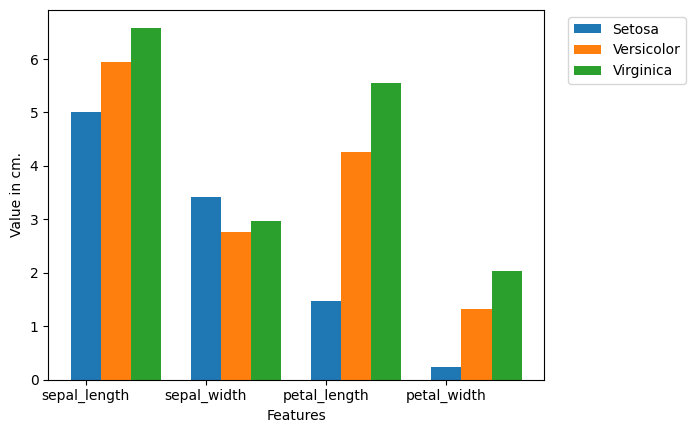

In [37]:
#plot the average

plt.bar(X_axis, Y_data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_data_reshaped[1], width, label = 'Versicolor')
plt.bar(X_axis+width*2, Y_data_reshaped[2], width, label = 'Virginica')
plt.xticks( X_axis, columns[ : 4 ] )
plt.xlabel('Features')
plt.ylabel('Value in cm.')
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [38]:
#splitting the dataset into train and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [39]:
#Support Vector Machine Algorithm

from sklearn.svm import SVC

svn = SVC()
svn.fit( X_train, Y_train )

SVC()

**Model Evaluation**

In [40]:
#predicting from the train dataset values

predictions = svn.predict(X_test)

In [41]:
#calculating the accuracy

from sklearn.metrics import accuracy_score

print("The accuracy score is:")
accuracy_score( Y_test, predictions )

The accuracy score is:


0.9

In [42]:
#depicting a detailed classification report

from sklearn.metrics import classification_report

print( classification_report( Y_test, predictions ) )

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.80      1.00      0.89        12
 Iris-virginica       1.00      0.67      0.80         9

       accuracy                           0.90        30
      macro avg       0.93      0.89      0.90        30
   weighted avg       0.92      0.90      0.90        30



**Testing the Model**

In [43]:
#testing the model with new dataset

X_new = np.array( [ [3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9] ] )

#prediction of the species from the input vector

prediction = svn.predict( X_new )
print('Prediction of Species: {}'.format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


In [45]:
#save the model

import pickle

with open( 'SVM.pickle', 'wb' ) as f:
    pickle.dump( svn, f )

#load the model

with open( 'SVM.pickle', 'rb' ) as f:
    model = pickle.load(f)

model.predict(X_new)    


array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)